# Hypotézy

1. Loajálnym zákazníkom menej prekáža horší inflight service ako neloajálnym zákazníkom.
2. Ľuďom nad 50 rokov menej prekáža zlé pokrytie wifi počas letu.
3. Ak je pasažier počas dlhého letu nespokojný s komfortom, tak je nespokojný aj s celým letom.
4. Počas dlhých letov je pasažierom ponúkané lepšie jedlo.
5. Čím dlhšie meškanie odletu, tak tým dlhšie meškanie príletu (hypotéza so spojitými dátami)


In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import random
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
df = pd.read_csv('dataset/airline_df.csv', index_col='Unnamed: 0')

In [3]:
def tests(x, y):
    for _ in range(20):
        x = random.sample(x, 100)
        y = random.sample(y, 100)

        print(chisquare(x, f_exp=y))

## 1. Loajálnym zákazníkom menej prekáža horší inflight service ako neloajálnym zákazníkom. 

### Nul. Loajálnym zákazníkom prekáža horší inflight service rovnako alebo viac ako neloajálnym zákazníkom

### Alt. Loajálnym zákazníkom prekáža horší inflight service menej neloajálnym zákazníkom

Na základe chisquare testu akceptujeme alternativnu hypotezu.

In [4]:
loyal_customer = df.loc[(df['Customer Type'] == 'Loyal Customer') & (df['Inflight service'] <= 3), 'satisfaction']
disloyal_customer = df.loc[(df['Customer Type'] == 'disloyal Customer') & (df['Inflight service'] <= 3), 'satisfaction']

neutral or dissatisfied    69.989389
satisfied                  30.010611
Name: satisfaction, dtype: float64

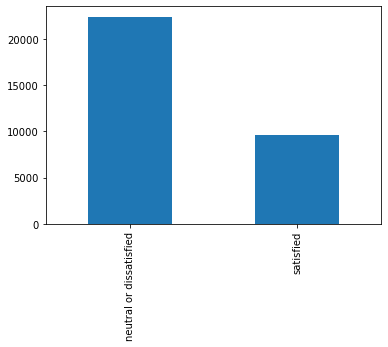

In [5]:
loyal_customer.value_counts().sort_index().plot(kind='bar')

loyal = loyal_customer.value_counts().sort_index()
loyal / sum(loyal.values.tolist()) * 100

neutral or dissatisfied    89.119247
satisfied                  10.880753
Name: satisfaction, dtype: float64

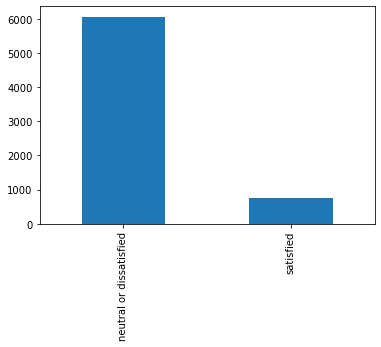

In [6]:
disloyal_customer.value_counts().sort_index().plot(kind='bar')

disloyal = disloyal_customer.value_counts().sort_index()
disloyal / sum(disloyal.values.tolist()) * 100

In [7]:
chisquare(loyal.values.tolist(), f_exp=disloyal.values.tolist())

Power_divergenceResult(statistic=150650.33163647066, pvalue=0.0)

## 2. Ľuďom nad 50 rokov menej prekáža zlá wifi počas letu

### Nul. ľuďom nad 50 rokov prekáža zlé pokrytie wifi rovnako alebo viac ako ľuďom pod 50 rokov.

### Alt. Ľuďom nad 50 rokov prekáža zlé pokrytie wifi počas letu menej ako ľuďom pod 50 rokov.
Na základe chisquare testu akceptujeme alternativnu hypotezu.

In [8]:
older_than_fifty = df.loc[(df['Age'] >= 50) & (df['Inflight wifi service'] <= 3), 'satisfaction']
younger_than_fifty = df.loc[(df['Age'] < 50) & (df['Inflight wifi service'] <= 3), 'satisfaction']

neutral or dissatisfied    65.361446
satisfied                  34.638554
Name: satisfaction, dtype: float64

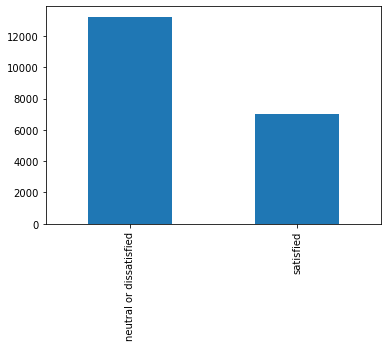

In [9]:
older_than_fifty.value_counts().plot(kind='bar')

older = older_than_fifty.value_counts().sort_index()
older / sum(older.values.tolist()) * 100

neutral or dissatisfied    71.766974
satisfied                  28.233026
Name: satisfaction, dtype: float64

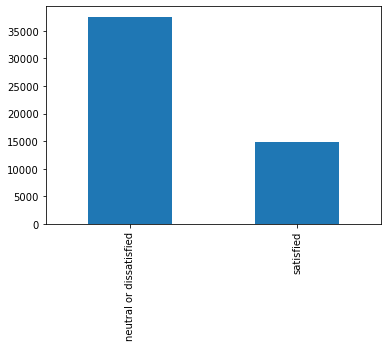

In [10]:
younger_than_fifty.value_counts().plot(kind='bar')

younger = younger_than_fifty.value_counts().sort_index()
younger / sum(younger.values.tolist()) * 100

In [11]:
chisquare(older.values.tolist(), f_exp=younger.values.tolist())

Power_divergenceResult(statistic=19872.3439764954, pvalue=0.0)

## 3 Ak je pasažier počas dlhého letu spokojný s komfortom, tak je spokojný aj s celým letom.

### Nul. Pasažieri, ktorí sú počas dlhého letu nespokojní s komfortom, tak sú spokojní s celým letom rovnako alebo viac ako tí čo sú spokojní s komfortom.

### Alt. Pasažieri, ktorí sú počas dlhého letu spokojní s komfortom, tak sú spokojní s celým letom viac ako tí čo nie sú spokojní s komfortom.

Na základe chisquare testu akceptujeme alternativnu hypotezu.

In [12]:
long_flights_discomfort = df.loc[(df['Flight Distance'] > 843) & (df['Seat comfort'] <= 3), 'satisfaction']
long_flights_comfort = df.loc[(df['Flight Distance'] > 843) & (df['Seat comfort'] > 3), 'satisfaction']

neutral or dissatisfied    75.60395
satisfied                  24.39605
Name: satisfaction, dtype: float64

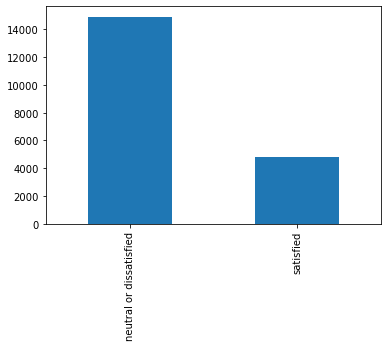

In [13]:
long_flights_discomfort.value_counts().sort_index().plot(kind='bar')

discomfort = long_flights_discomfort.value_counts().sort_index()
discomfort / sum(discomfort.values.tolist()) * 100

neutral or dissatisfied    28.45291
satisfied                  71.54709
Name: satisfaction, dtype: float64

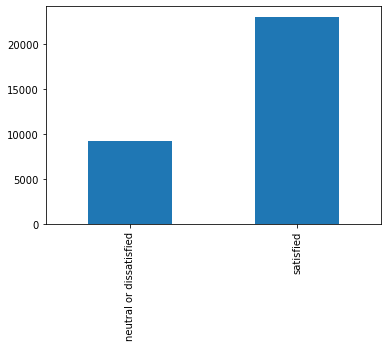

In [14]:
long_flights_comfort.value_counts().sort_index().plot(kind='bar')

comfort = long_flights_comfort.value_counts().sort_index()
comfort / sum(comfort.values.tolist()) * 100

In [15]:
chisquare(comfort.values.tolist(), f_exp=discomfort.values.tolist())

Power_divergenceResult(statistic=71063.82220382005, pvalue=0.0)

## 4 Počas dlhých letov je pasažierom ponúkané lepšie jedlo ako je ponúkané počas krátkych letov.
Za dlhé lety sú považované tie, ktorých vzdialenosť je väčšia ako medián.

### Nul. Počas dlhých letov je pasažierom ponúkané horšie/rovnako kvalitné jedlo ako je ponúkané počas krátkych letov.

### Alt. Počas dlhých letov je pasažierom ponúkané kvalitnejšie jedlo ako je ponúkané počas krátkych letov.

Na základe chisquare testu akceptujeme alternativnu hypotezu.

In [16]:
long_flights = df.loc[df['Flight Distance'] > 843, 'Food and drink']
short_flights = df.loc[df['Flight Distance'] <= 843, 'Food and drink']

0     0.098213
1    10.504930
2    21.395008
3    21.666538
4    24.158450
5    22.176860
Name: Food and drink, dtype: float64

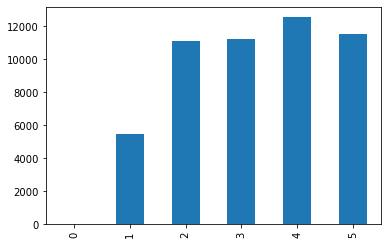

In [17]:
long_flights.value_counts().sort_index().plot(kind='bar')

long_f = long_flights.value_counts().sort_index()
long_f / sum(long_f.values.tolist()) * 100

0     0.107742
1    14.202709
2    20.928890
3    21.257888
4    22.729721
5    20.773049
Name: Food and drink, dtype: float64

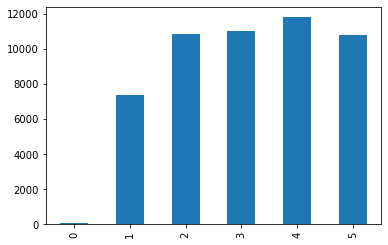

In [18]:
short_flights.value_counts().sort_index().plot(kind='bar')

short = short_flights.value_counts().sort_index()
short / sum(short.values.tolist()) * 100

In [19]:
chisquare(long_f.values.tolist(), f_exp=short.values.tolist())

Power_divergenceResult(statistic=605.2234165579808, pvalue=1.5040015135005838e-128)

## 5 Rozdiel dĺžky meškania odletu pasažierov, ktorí sú spokojní s letom a pasažierov, ktorí sú nespokojní s letom je signifikantný.

### Nul Rozdiel dĺžky meškania odletu pasažierov, ktorí sú spokojní s letom a tých, ktorých sú nespokojní s letom nie je signigikantný.

### Alt Rozdiel dĺžky meškania odletu pasažierov, ktorí sú spokojní s letom a tých, ktorých sú nespokojní s letom je signigikantný.

Na základe Mann Whitney U-testu akceptujeme nulovú hypotézu.

(0.44895005226135254, 0.0)

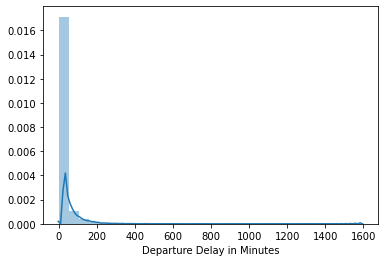

In [20]:
delay_dissatisfied = df.loc[(df['satisfaction'] == 'neutral or dissatisfied'), 'Departure Delay in Minutes']
sns.distplot(delay_dissatisfied, bins=30)

stats.shapiro(delay_dissatisfied)

(0.38682037591934204, 0.0)

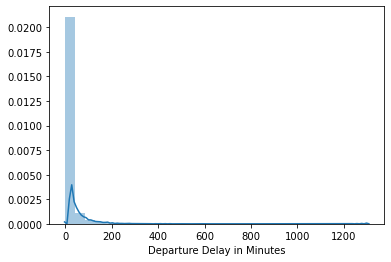

In [21]:
delay_satisfied = df.loc[(df['satisfaction'] == 'satisfied'), 'Departure Delay in Minutes']
sns.distplot(delay_satisfied, bins=30)

stats.shapiro(delay_satisfied)

In [22]:
for _ in range(20):
    x = random.sample(delay_dissatisfied.tolist(), 100)
    y = random.sample(delay_satisfied.tolist(), 100)

    print(stats.mannwhitneyu(x, y))


MannwhitneyuResult(statistic=4553.5, pvalue=0.12148101142419726)
MannwhitneyuResult(statistic=4914.0, pvalue=0.4079296739942819)
MannwhitneyuResult(statistic=4717.0, pvalue=0.22417094589371378)
MannwhitneyuResult(statistic=4610.5, pvalue=0.14151672816315825)
MannwhitneyuResult(statistic=4425.0, pvalue=0.05939317954926799)
MannwhitneyuResult(statistic=4812.5, pvalue=0.3029003431881437)
MannwhitneyuResult(statistic=4303.5, pvalue=0.030883774481694406)
MannwhitneyuResult(statistic=4273.5, pvalue=0.021809848672032235)
MannwhitneyuResult(statistic=4129.5, pvalue=0.009083294752779516)
MannwhitneyuResult(statistic=4110.5, pvalue=0.007403562618188942)
MannwhitneyuResult(statistic=4469.0, pvalue=0.07783915592580327)
MannwhitneyuResult(statistic=4532.5, pvalue=0.09716043465872837)
MannwhitneyuResult(statistic=4539.0, pvalue=0.10888284092725226)
MannwhitneyuResult(statistic=4886.5, pvalue=0.38206632791826467)
MannwhitneyuResult(statistic=4844.5, pvalue=0.34070086146976053)
MannwhitneyuResult(stat